In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('../data/resolver-probe-medians.db')
df_v4 = pd.read_sql('select * from heatmap_v4', con=conn)
df_v6 = pd.read_sql('select * from heatmap_v6', con=conn)
conn.close()

In [3]:
len(df_v4)

2444

In [4]:
len(df_v6)

1153

In [5]:
df_v4.groupby('continent').median().drop(columns=['probe_id', 'probe_count_continent'])

,CleanBrowsing,Cloudflare,Google,Neustar,NextDNS,OpenDNS,OpenNIC,Quad9,VeriSign,Yandex,local
continent,,,,,,,,,,,
AF,71.76100,8.56050,176.96000,NaN,48.58200,62.09900,NaN,23.21925,174.92000,204.145,46.61100
AS,33.56925,10.23250,23.82800,30.74900,30.13100,25.98425,30.77725,57.78925,86.94200,202.745,24.05225
EU,24.28600,12.66825,19.11025,1.80650,18.61700,17.04500,1.70450,19.62250,26.77700,46.890,13.86575
NA,21.26700,15.74525,21.13450,1.30275,20.42950,16.96900,1.31700,22.50025,31.04450,150.148,23.23100
OC,25.08100,9.49950,23.61000,0.95000,10.75025,19.23675,0.96250,25.64000,140.03375,315.707,29.20875
SA,111.05075,23.78800,28.22750,1.88350,23.37900,39.57850,4.07625,131.20100,161.37975,261.219,17.90600


In [6]:
df_v6[df_v6['Neustar'].notnull()]

,probe_id,CleanBrowsing,Cloudflare,Google,Neustar,NextDNS,OpenDNS,OpenNIC,Quad9,VeriSign,Yandex,continent,country,local,probe_count_continent
515,27765,2.5415,2.5135,NaN,2.495,2.4720,2.4355,2.521,2.4580,2.5075,2.456,EU,NO,51.7110,1732
633,30255,41.6430,38.1990,NaN,39.132,273.9410,39.6085,37.656,39.4815,39.7055,38.161,AS,CN,NaN,149
1114,55328,9.5015,7.8480,NaN,7.931,9.5885,9.0720,7.615,7.9670,7.3640,8.001,AS,CN,1.4015,149


In [7]:
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

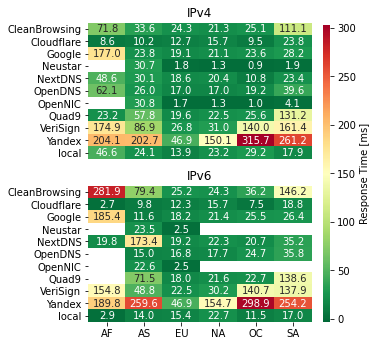

In [9]:
fig, (ax_v4, ax_v6) = plt.subplots(figsize=(4, 5.5), nrows=2)

cbar_ax = fig.add_axes([0.94, .125, .025, 0.75])

ax_v4 = sns.heatmap(df_v4.groupby('continent').median().drop(columns=['probe_id', 'probe_count_continent']).T,
            annot=True,
            cmap="RdYlGn_r",
            cbar_kws={'label' : 'Response Time [ms]',
#                       'format': FuncFormatter(lambda x, pos: '{:.1%}'.format(x))
                     },
            fmt='.1f',
            vmin=-3,
            vmax=303,
            ax=ax_v4,
            xticklabels=False,
            cbar_ax=cbar_ax
           )
ax_v4.set_xlabel('')
ax_v4.set_ylabel('')
ax_v4.set_title('IPv4')

ax_v6 = sns.heatmap(df_v6.groupby('continent').median().drop(columns=['probe_id', 'probe_count_continent']).T,
            annot=True,
            cmap="RdYlGn_r",
            cbar_kws={'label' : 'Response Time [ms]',
#                       'format': FuncFormatter(lambda x, pos: '{:.1%}'.format(x))
                     },
            fmt='.1f',
            vmin=-3,
            vmax=303,
            ax=ax_v6,
            cbar_ax=cbar_ax
           )
ax_v6.set_xlabel('')
ax_v6.set_ylabel('')
ax_v6.set_title('IPv6')

plt.subplots_adjust(wspace=0.125)

fig.savefig('../plots/response-times-heatmap-continents.pdf', bbox_inches='tight')
fig.savefig('../plots/response-times-heatmap-continents.eps', bbox_inches='tight')

In [10]:
print(df_v4.groupby('continent').median().drop(columns=['probe_id', 'probe_count_continent']).T['EU'].mean())
print(df_v6.groupby('continent').median().drop(columns=['probe_id', 'probe_count_continent']).T['EU'].mean())

18.399340909090906
18.128704545454546


In [11]:
print(df_v4.groupby('continent').median().drop(columns=['probe_id', 'probe_count_continent']).T['NA'].mean())
print(df_v6.groupby('continent').median().drop(columns=['probe_id', 'probe_count_continent']).T['NA'].mean())

29.55352272727273
36.735055555555554


In [12]:
print(df_v4.groupby('continent').median().drop(columns=['probe_id', 'probe_count_continent']).T['SA'].mean())
print(df_v6.groupby('continent').median().drop(columns=['probe_id', 'probe_count_continent']).T['SA'].mean())

73.06265909090908
90.00233333333333


In [13]:
print(df_v4.groupby('continent').median().drop(columns=['probe_id', 'probe_count_continent']).T['AF'].mean())
print(df_v6.groupby('continent').median().drop(columns=['probe_id', 'probe_count_continent']).T['AF'].mean())

90.76197222222221
119.61242857142857


In [14]:
print(df_v4.groupby('continent').median().drop(columns=['probe_id', 'probe_count_continent']).T['AS'].mean())
print(df_v6.groupby('continent').median().drop(columns=['probe_id', 'probe_count_continent']).T['AS'].mean())

50.61815909090908
66.29193181818181


In [15]:
print(df_v4.groupby('continent').median().drop(columns=['probe_id', 'probe_count_continent']).T['OC'].mean())
print(df_v6.groupby('continent').median().drop(columns=['probe_id', 'probe_count_continent']).T['OC'].mean())

54.60722727272727
65.38319444444444
